<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [24]:
# Libraries for data loading, data manipulation and data visulisation
import nltk
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot style
sns.set()

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer

# Libraries for data preparation and model building
# from sklearn import preprocessing
# from sklearn.utils import resample
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [7]:
df = pd.read_csv('kaggle_data/train.csv', encoding='ascii', encoding_errors='ignore')# load the data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [24]:
df.head()# look at data statistics

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 309.0+ KB


In [26]:
df.shape

(15819, 3)

In [27]:
sentiments = list(df.sentiment.unique())

In [28]:
sentiments

[1, 2, 0, -1]

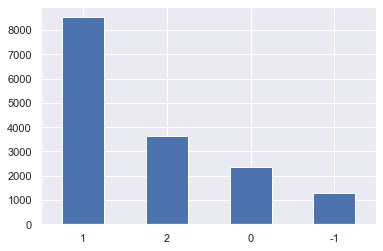

In [29]:
df.sentiment.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

In [30]:
messages = np.array(df.message)

In [31]:
messages[:20]

array(["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",
       "It's not like we lack evidence of anthropogenic global warming",
       'RT @RawStory: Researchers say we have three years to act on climate change before its too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT',
       '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD',
       "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",
       "Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j",
       'RT @thenation: Mike Pence doesnt believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R',
       'RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activist https://t.co/

Lets remove stopwords

In [14]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# # target url
# url = 'https://www.geeksforgeeks.org/'
  
# # making requests instance
# reqs = requests.get(url)
  
# # using the BeaitifulSoup module
# soup = BeautifulSoup(reqs.text, 'html.parser')
  
# # displaying the title
# print("Title of the website is : ")
# for title in soup.find_all('title'):
#     print(title.get_text())

In [8]:
def extract_web_title(text):
    from bs4 import BeautifulSoup
    import requests
    
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    match = re.search(pattern_url, text)
    url_titles = []
    # for url in match:
    response = requests.get(match.group())
    soup = BeautifulSoup(response.text, 'html.parser')
    for title in soup.find_all('title'):
        if title:
            url_titles.append(title.get_text())
        else:
            url_titles.append("")
    return url_titles, pattern_url

In [11]:
def handle_weblinks(text):
    # using regex to sub weblinks with 
    # more reasonable text
    get_data = extract_web_title(text)
    pattern_url = get_data[1]
    subs_text = get_data[0]
    
    for subs in subs_text:
        text = re.sub(pattern_url, subs, text, count=1)
    
    text = re.sub(pattern_url, "", text)
    
    return text

In [17]:
def remove_punctuations(text):
    # using regex to remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

In [18]:
def remove_stopwords(text):
    text = text.lower()
    stop_words = stopwords.words('english')
    text = " ".join([word for word in text.split(" ") if word not in stop_words])
    
    return text

In [19]:
def tokenize(text):
    tokenizer = TreebankWordTokenizer()
    
    return tokenizer.tokenize(text)

In [37]:
def transform(text_list, method='lemma'):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    if method == 'lemma':
        words = [lemmatizer.lemmatize(word) for word in text_list]
        return words
    elif method == 'stem':
        words = [stemmer.stem(word) for word in text_list]
        return words
    else:
        return(f"ERROR: '{method}' is an unknown transformation method use 'stem' or 'lemma'")

In [39]:
word = handle_weblinks("Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j")
word = remove_punctuations(word)
word = remove_stopwords(word)
word = tokenize(word)
word = transform(word, method='stems')
print(word)

ERROR: stems is an unknown transformation method use 'stem' or 'lemma'


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [247]:
def vectorizer(data, X, y, vectorizer, n_grams, max_feature=20):
    #convert column_name to type category
    if vectorizer == 'tfidf':
        vector = TfidfVectorizer(lowercase=True, stop_words='english', max_features=max_feature,analyzer='word', ngram_range=n_grams)
    else:
        vector = CountVectorizer(lowercase=True, stop_words='english', max_features=max_feature,analyzer='word', ngram_range=n_grams)
    
    print(f"using {vector}")
    
    data[X] = data[X].astype('category')
    vectored = vector.fit_transform(data[X])
    X = vectored.toarray()
    y = data[y]
    
    return X, y

In [ ]:
# sia = SentimentIntensityAnalyzer()

# df[['neg', 'neu', 'pos', 'compound']] == df['message'].apply(sia.polarity_scores).apply(pd.series)

In [303]:
def resampler(data, y, kind='downsample'):
    # separate the values
    y_values = {}
    
    for value in data[y].unique():
        value_list = data[data[y] == value]
        y_values[value] = len(value_list)
        
    # get value with max count
    values = data[y].value_counts()
    min_ = values.min()
    max_ = values.max()
    value_max = int(values[values == max_].index.values[0])
    value_min = int(values[values == min_].index.values[0])
    
    
    if kind == 'downsample':
        sampling = resample(value_max, replace=False, n_samples=y_values[eval(str(value_min))], random_state=27)
    
    elif kind == 'upsample':
        sampling = resample(value_min, replace=True, n_samples=y_values[eval(str(value_max))], random_state=27)
    
    return y_values[value_min]

In [316]:
# resampler(df, 'sentiment')

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)# split data

In [217]:
logreg = LogisticRegression(multi_class='ovr')

In [218]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [219]:
y_pred = logreg.predict(X_test)

In [220]:
rfc = RandomForestClassifier()

In [221]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [222]:
rfc_pred = rfc.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [223]:
# Compare model performance
import warnings
warnings.filterwarnings('ignore')
classification = classification_report(y_test, y_pred, target_names=['-1', '0', '1', '2'])

print(classification)

              precision    recall  f1-score   support

          -1       0.43      0.06      0.10       219
           0       0.41      0.18      0.25       461
           1       0.67      0.82      0.74      1759
           2       0.59      0.62      0.60       725

    accuracy                           0.63      3164
   macro avg       0.53      0.42      0.43      3164
weighted avg       0.60      0.63      0.59      3164



In [224]:
# Choose best model and motivate why it is the best choice

classification = classification_report(y_test, rfc_pred, target_names=['-1', '0', '1', '2'])

print(classification)

              precision    recall  f1-score   support

          -1       0.32      0.15      0.20       219
           0       0.41      0.25      0.31       461
           1       0.67      0.78      0.72      1759
           2       0.60      0.62      0.61       725

    accuracy                           0.62      3164
   macro avg       0.50      0.45      0.46      3164
weighted avg       0.59      0.62      0.60      3164



In [225]:
test = pd.read_csv('kaggle_data/test.csv')

In [226]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [227]:
test_x = vector.fit_transform(test.message).toarray()

In [228]:
pred_y = rfc.predict(test_x)

In [229]:
pred_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [230]:
#baseline submission

In [231]:
submission_sample = pd.read_csv('kaggle_data/sample_submission.csv')

In [232]:
submission_sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [233]:
y_pred

array([ 1, -1,  1, ...,  1,  0,  1], dtype=int64)

In [234]:
sub_file = submission_sample.copy()

In [235]:
sub_file.tweetid = test.tweetid

In [236]:
sub_file.sentiment= pred_y

In [237]:
sub_file.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [238]:
sub_file.to_csv("baseline.csv", index=False)

In [239]:
submission_sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic